<a href="https://colab.research.google.com/github/bhushanpatil16/EDA_playstoredataset_project/blob/main/Bhushanpatil_Panda_SQL_capstonproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **STORE DATA ANALYSIS USING PANDA SQL**


### **Project Type**    - PANDA SQL
 ### **Contribution**    - Individual
 ### **Team Member 1** - Bhushan s patil

# **Project Summary -**

This project focuses on analyzing store data using Panda SQL. It involves leveraging the power of Panda SQL to perform efficient data manipulation and analysis, enabling valuable insights to be extracted from the store dataset.
Steps involved in this are as follows:
- import the data
- check the data
- cleaning the data
- analyzing the data
- visualizing the data
- conclusion

# **GitHub Link -**

# **Problem Statement:**

A retail store chain has collected a significant amount of data about its operations,
including sales transactions, customer demographics, product information, and store
performance. However, this data is currently disorganized and underutilized.

The store management team needs a way to effectively analyze this data to:
Identify key trends and patterns in sales, customer behavior, and product performance.
Understand the factors driving sales and profitability.
Optimize pricing, inventory management, and marketing strategies.
Improve customer satisfaction and loyalty.
Gain a competitive advantage in the market.

This project aims to leverage Panda SQL to analyze the store's dataset and provide
actionable insights to address these challenges and support data-driven decision-making.


## **Business Objective**
- Increase overall sales revenue by X% in the next quarter.
- Improve customer retention rate by Y% by year-end.
- Identify and target the top Z% of most profitable customers.
- Optimize inventory levels to reduce carrying costs by W%.
- Increase average transaction value by V% through upselling and cross-selling strategies.

### **Let us start by importing some of the required libraries with which we will be working on.**

In [18]:
# Import Libraries
import pandas as pd
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
! pip install pandas pandasql

In [81]:
# Load Dataset
df = pd.read_csv('/content/Store.csv',encoding='unicode_escape')   #as it is a csv file will use pd.read_cvs() to read the dat


### **Dataset First View**
After loading the dataset, we can start the exploration but before that, we need to check and see that the dataset is ready for performing several exploration operations or not, so let’s first have a look at the structure and the manner in which the data is organized.

In [80]:
df.head() #Shows top  row in dataset

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Product_Name,Sales,Quantity,Discount,Profit,Discount_Amount,Years,Customer_Duration,Returned_Items,Return_Reason
0,7981,CA-2011-103800,2013-01-03,2013-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,3.2896,2013,old customer,Not Returned,Not Returned
1,740,CA-2011-112326,2013-01-04,2013-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Avery 508,11.784,3,0.2,4.2717,2.3568,2013,old customer,Not Returned,Not Returned
2,741,CA-2011-112326,2013-01-04,2013-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748,54.5472,2013,old customer,Not Returned,Not Returned
3,742,CA-2011-112326,2013-01-04,2013-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870,2.8320,2013,old customer,Not Returned,Not Returned
4,1760,CA-2011-141817,2013-01-05,2013-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840,3.9072,2013,old customer,Not Returned,Not Returned


In [ ]:
df.shape # .shape function returns the shape of the data set

(9989, 26)

In [8]:
# Establish a connection to the SQLite database 'store.db'
conn = sqlite3.connect('store.db')
# Write the DataFrame 'df' to a SQL table named 'store'
# If the table exists, replace it; otherwise, create it
# Don't include the DataFrame index in the SQL table

df.to_sql('store',conn, if_exists ='replace', index = False)
# Close the database connection
conn.close()

In [9]:
conn = sqlite3.connect('store.db')  # Establish a connection to the SQLite database 'store.db'
conn.commit()                 # Commit any changes to the database
user = pd.read_sql_query('''select * from store''',conn)  # Read data from the 'store' table in the database and store it in a Pandas DataFrame


In [10]:
pd.read_sql_query('''

select * from store

''',conn)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Product_Name,Sales,Quantity,Discount,Profit,Discount_Amount,Years,Customer_Duration,Returned_Items,Return_Reason
0,7981,CA-2011-103800,2013-01-03,2013-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,3.2896,2013,old customer,Not Returned,Not Returned
1,740,CA-2011-112326,2013-01-04,2013-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Avery 508,11.784,3,0.2,4.2717,2.3568,2013,old customer,Not Returned,Not Returned
2,741,CA-2011-112326,2013-01-04,2013-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748,54.5472,2013,old customer,Not Returned,Not Returned
3,742,CA-2011-112326,2013-01-04,2013-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870,2.8320,2013,old customer,Not Returned,Not Returned
4,1760,CA-2011-141817,2013-01-05,2013-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840,3.9072,2013,old customer,Not Returned,Not Returned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,908,CA-2014-143259,2016-12-30,2017-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,Gear Head AU3700S Headset,90.930,7,0.0,2.7279,0.0000,2016,old customer,Not Returned,Not Returned
9985,909,CA-2014-143259,2016-12-30,2017-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910,10.5552,2016,old customer,Not Returned,Not Returned
9986,1297,CA-2014-115427,2016-12-30,2017-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,2.7808,2016,old customer,Returned,Product Description Inaccurate
9987,1298,CA-2014-115427,2016-12-30,2017-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,GBC Binding covers,20.720,2,0.2,6.4750,4.1440,2016,old customer,Returned,Product Description Inaccurate


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9989 entries, 0 to 9988
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Row_ID             9989 non-null   int64  
 1   Order_ID           9989 non-null   object 
 2   Order_Date         9989 non-null   object 
 3   Ship_Date          9989 non-null   object 
 4   Ship_Mode          9989 non-null   object 
 5   Customer_ID        9989 non-null   object 
 6   Customer_Name      9989 non-null   object 
 7   Segment            9989 non-null   object 
 8   Country            9989 non-null   object 
 9   City               9989 non-null   object 
 10  States             9989 non-null   object 
 11  Postal_Code        9989 non-null   int64  
 12  Region             9989 non-null   object 
 13  Product_ID         9989 non-null   object 
 14  Category           9989 non-null   object 
 15  Sub_Category       9989 non-null   object 
 16  Product_Name       9989 

In [ ]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'States',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Discount_Amount', 'Years', 'Customer_Duration', 'Returned_Items',
       'Return_Reason'],
      dtype='object')

### **1) Region having highest number of orders**

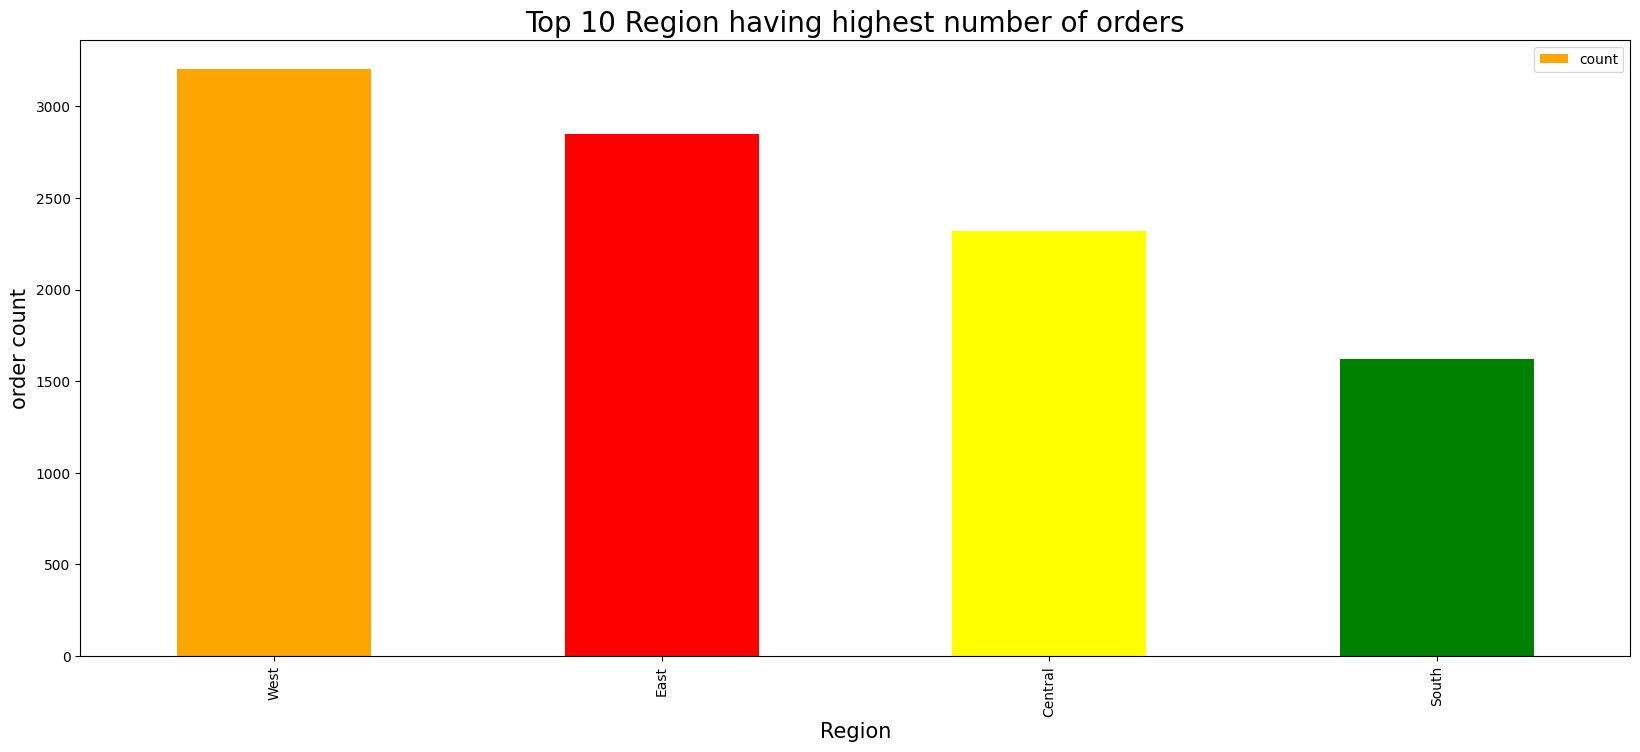

In [32]:
colors = ['orange', 'r', 'yellow', 'g', 'm', 'k']
df['Region'].value_counts().plot.bar(figsize=(20,8), color = colors )  #ploting bar plot
plt.xlabel('Region',fontsize = 15 )             #labeling x axis
plt.ylabel('order count', fontsize = 15)              #labeling y axis
plt.title('Top 10 Region having highest number of orders', fontsize = 20)  #giving title
plt.legend();

In [28]:
k = pd.read_sql_query('''

Select Region, COUNT('Product_ID') from store
group by Region
order by COUNT('Product_ID') desc LIMIT 10

''',conn)
k

,Region,COUNT('Product_ID')
0,West,3202
1,East,2847
2,Central,2321
3,South,1619


### **2) Category of product  ordered the most**

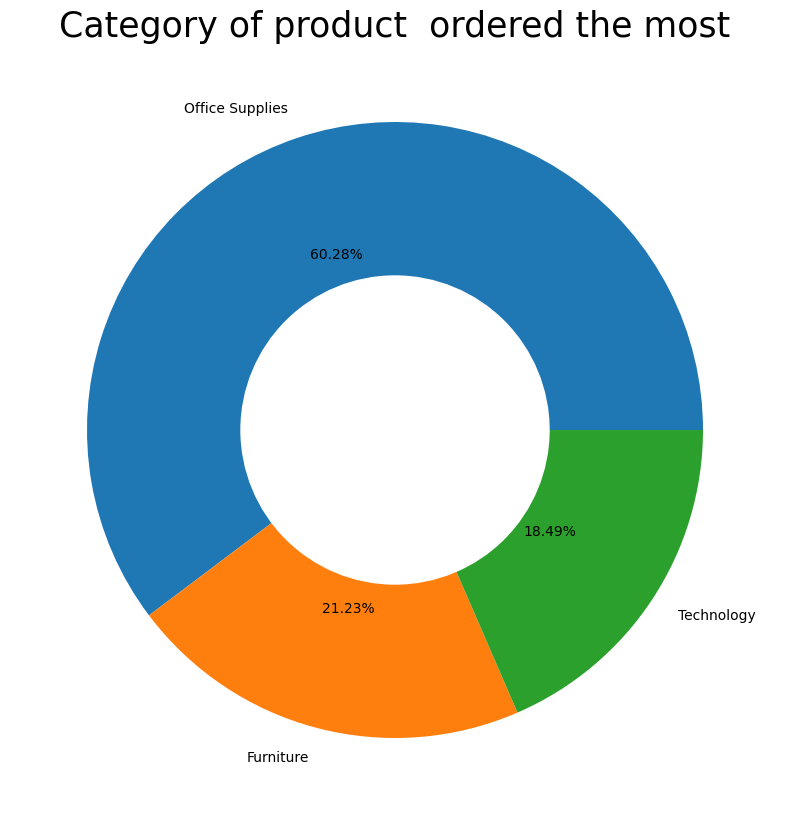

In [38]:
plt.figure(figsize=(10,10))
plt.pie(df.Category.value_counts(), labels=df.Category.value_counts().index, autopct='%1.2f%%')
my_circle = plt.Circle( (0,0), 0.50, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Category of product  ordered the most', fontsize = 25)
plt.show()

In [29]:
k = pd.read_sql_query('''

Select Category, COUNT('Category') from store
group by Category
order by COUNT('Category') desc LIMIT 10

''',conn)
k

,Category,COUNT('Category')
0,Office Supplies,6021
1,Furniture,2121
2,Technology,1847


### **3) which category has the highest amount of return**

In [44]:
k = pd.read_sql_query('''

select Category,count(Return_Reason) from store
where Returned_Items = 'Returned'
group by Category
order by count(Return_Reason) desc

''',conn)
k

,Category,count(Return_Reason)
0,Office Supplies,473
1,Furniture,171
2,Technology,156


### **4) Find Top  Reasons for returning**

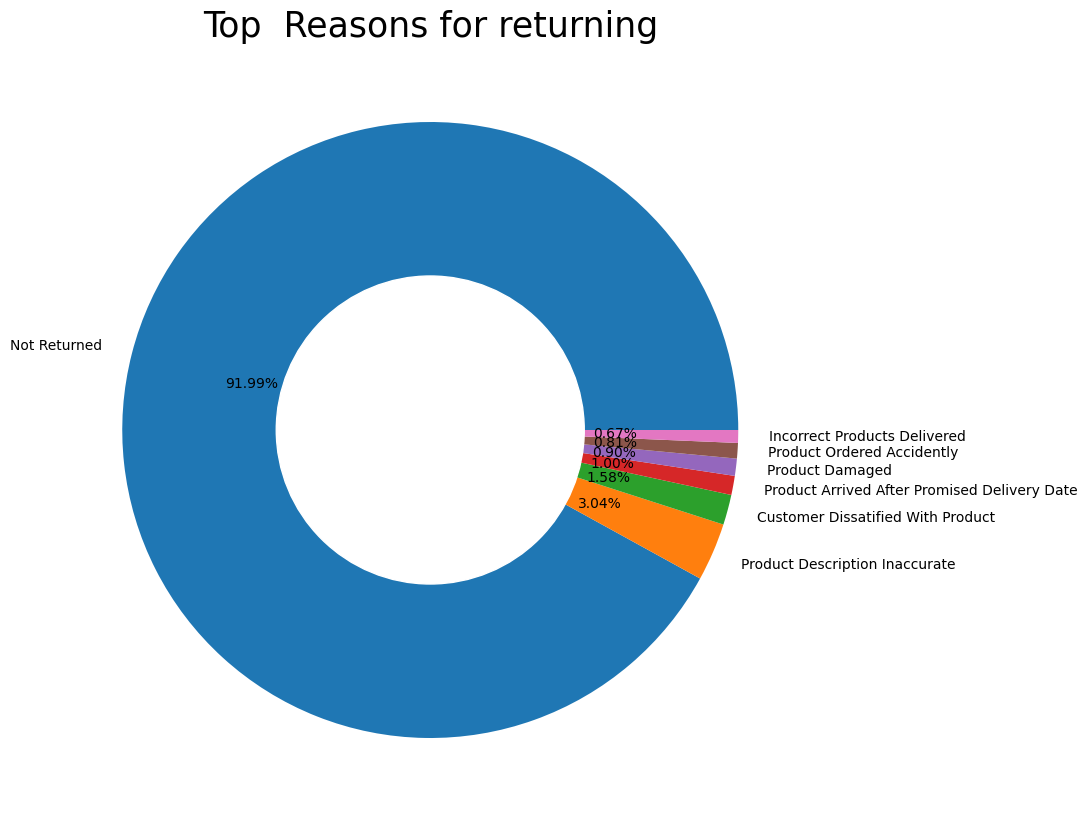

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(df.Return_Reason.value_counts(), labels=df.Return_Reason.value_counts().index, autopct='%1.2f%%')
my_circle = plt.Circle( (0,0), 0.50, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Top  Reasons for returning', fontsize = 25)
plt.show()

In [24]:
k = pd.read_sql_query('''

select Return_Reason,count(Return_Reason) from store
where Returned_Items = 'Returned'
group by Return_Reason
order by count(Return_Reason) desc

''',conn)
k

,Return_Reason,count(Return_Reason)
0,Product Description Inaccurate,304
1,Customer Dissatified With Product,158
2,Product Arrived After Promised Delivery Date,100
3,Product Damaged,90
4,Product Ordered Accidently,81
5,Incorrect Products Delivered,67


In [ ]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'States',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Discount_Amount', 'Years', 'Customer_Duration', 'Returned_Items',
       'Return_Reason'],
      dtype='object')

### **5) Check whether new customers are returning higher or not.**

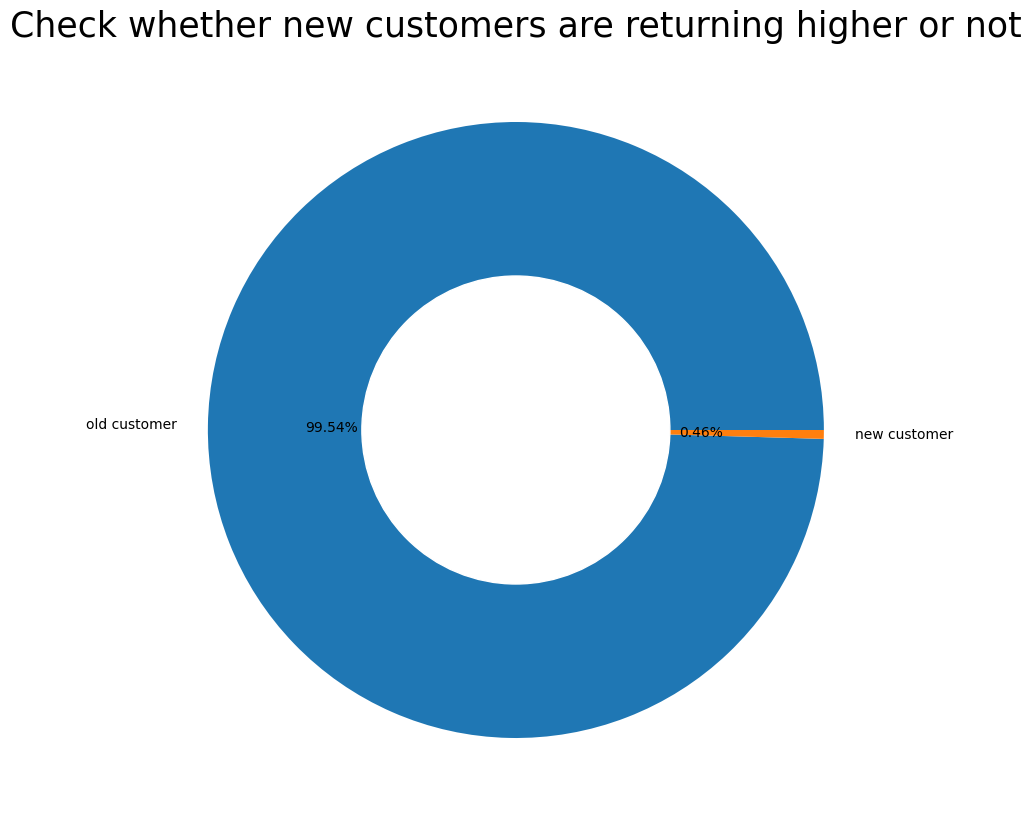

In [43]:
plt.figure(figsize=(10,10))
plt.pie(df.Customer_Duration.value_counts(), labels=df.Customer_Duration.value_counts().index, autopct='%1.2f%%')
my_circle = plt.Circle( (0,0), 0.50, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Check whether new customers are returning higher or not', fontsize = 25)
plt.show()

In [ ]:
pd.read_sql_query('''

select Customer_Duration, count(Customer_Duration) from store
where Returned_Items = 'Returned'
group by Customer_Duration


''',conn)

,Customer_Duration,count(Customer_Duration)
0,new customer,4
1,old customer,796


### **6) Find Top 20 cities and states having higher return.**

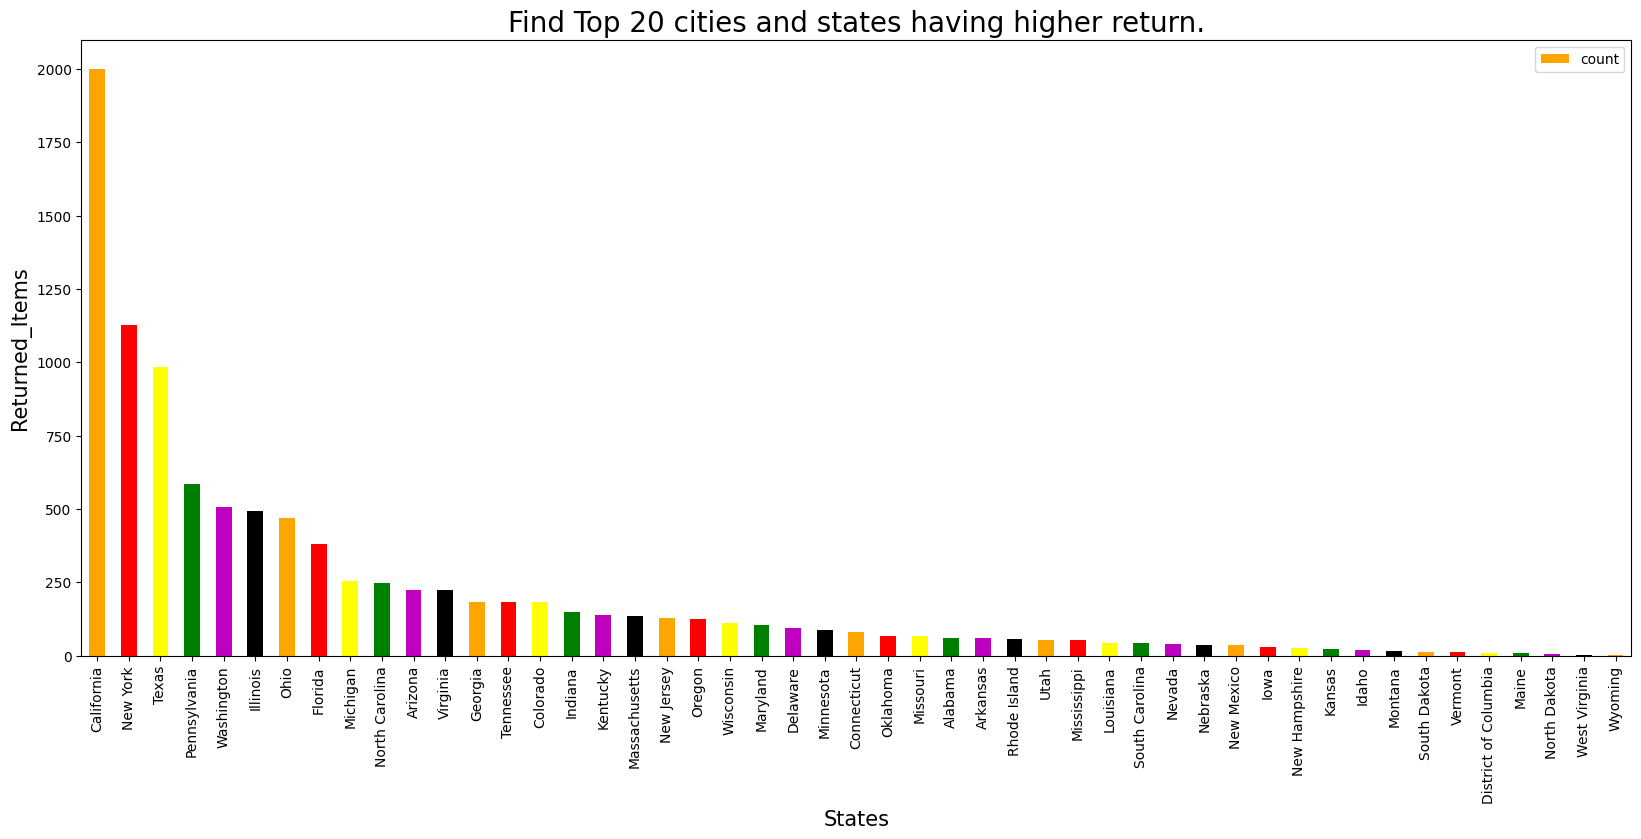

In [33]:
colors = ['orange', 'r', 'yellow', 'g', 'm', 'k']
df['States'].value_counts().plot.bar(figsize=(20,8), color = colors )  #ploting bar plot
plt.xlabel('States',fontsize = 15 )             #labeling x axis
plt.ylabel('Returned_Items', fontsize = 15)              #labeling y axis
plt.title('Find Top 20 cities and states having higher return.', fontsize = 20)  #giving title
plt.legend();

In [ ]:
pd.read_sql_query('''

select City, states,Returned_Items,count(Returned_Items) from store
where Returned_Items = 'Returned'
group by City,states
order by count(Returned_Items) desc
limit 20


''',conn)

,City,States,Returned_Items,count(Returned_Items)
0,Los Angeles,California,Returned,117
1,San Francisco,California,Returned,64
2,Seattle,Washington,Returned,60
3,New York City,New York,Returned,45
4,San Diego,California,Returned,18
5,Phoenix,Arizona,Returned,16
6,Philadelphia,Pennsylvania,Returned,13
7,Brentwood,California,Returned,12
8,Chicago,Illinois,Returned,12
9,Salem,Oregon,Returned,12


### **7) Find Top 10 Customers Returned Frequently.:**

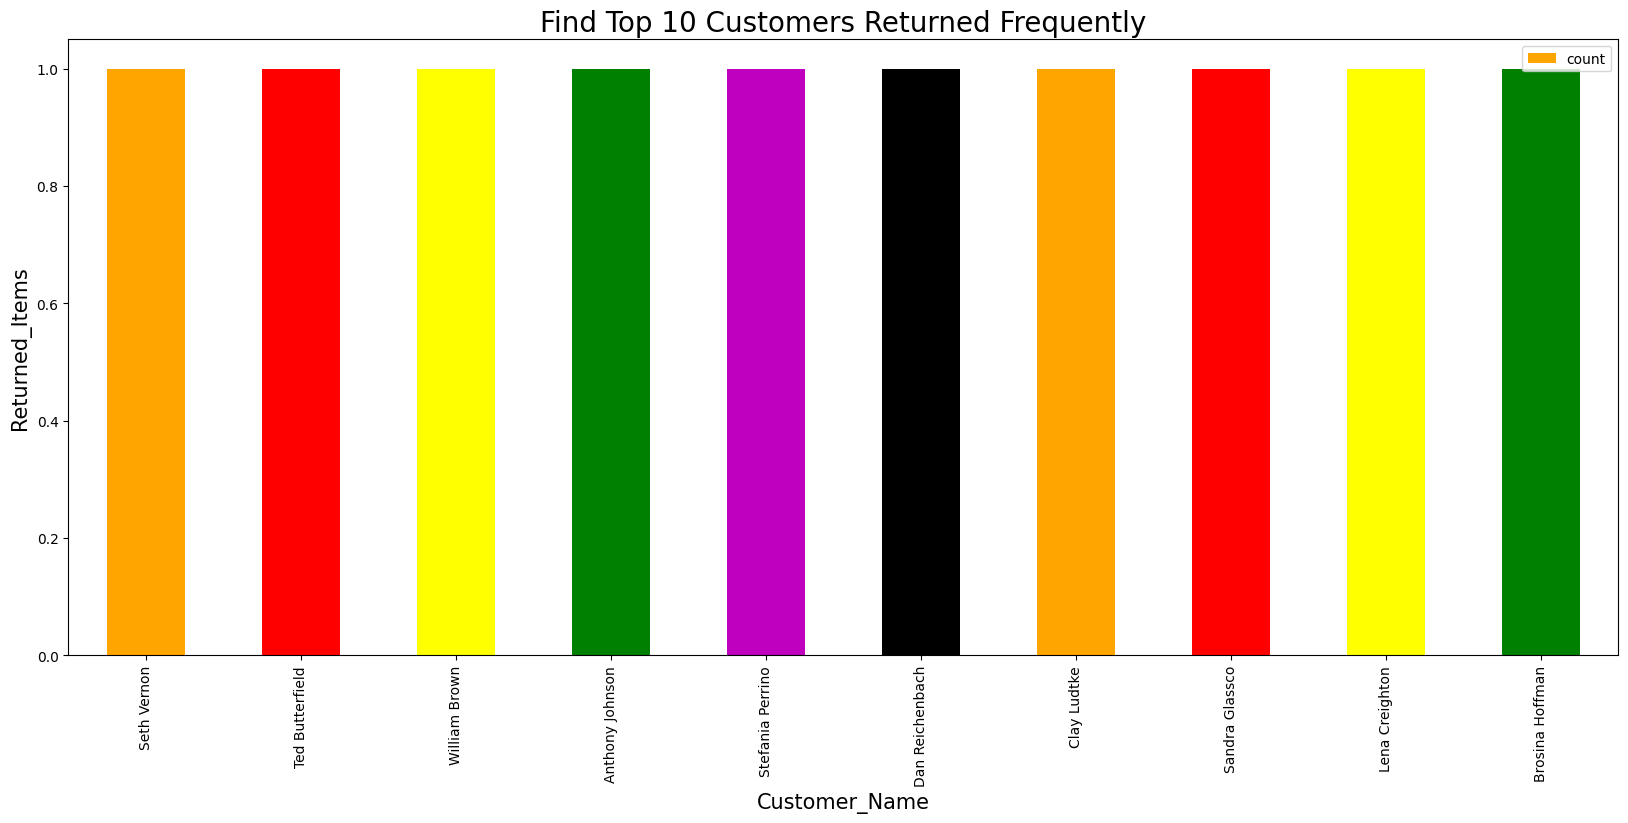

In [73]:
k = pd.read_sql_query('''

select Customer_Name,Returned_Items,count(Returned_Items) from store
where Returned_Items = 'Returned'
group by Customer_Name
order by count(Returned_Items) desc
limit 10


''',conn)

colors = ['orange', 'r', 'yellow', 'g', 'm', 'k']
k['Customer_Name'].value_counts().plot.bar(figsize=(20,8), color = colors )  #ploting bar plot
plt.xlabel('Customer_Name',fontsize = 15 )             #labeling x axis
plt.ylabel('Returned_Items', fontsize = 15)              #labeling y axis
plt.title('Find Top 10 Customers Returned Frequently', fontsize = 20)  #giving title
plt.legend();

In [ ]:
pd.read_sql_query('''

select Customer_ID,Customer_Name, count(Returned_Items) from store
where Returned_Items = 'Returned'
group by Customer_ID
order by count(Returned_Items) desc
limit 10


''',conn)

,Customer_ID,Customer_Name,count(Returned_Items)
0,SV-20365,Seth Vernon,14
1,TB-21055,Ted Butterfield,13
2,WB-21850,William Brown,11
3,AJ-10795,Anthony Johnson,11
4,SP-20620,Stefania Perrino,10
5,DR-12880,Dan Reichenbach,10
6,CL-12565,Clay Ludtke,10
7,SG-20080,Sandra Glassco,9
8,LC-16885,Lena Creighton,9
9,BH-11710,Brosina Hoffman,9


### **8) Find Top 10  Returned Sub-Categories.:**

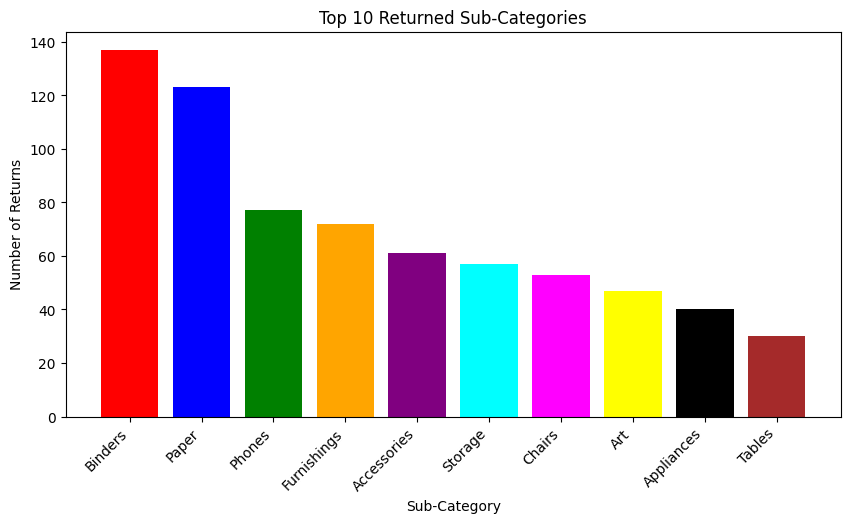

In [77]:
# Execute an SQL query to find the top 10 returned sub-categories.
k = pd.read_sql_query('''
SELECT Sub_Category, COUNT(Returned_Items) AS Returned_Count
FROM store
WHERE Returned_Items = 'Returned'
GROUP BY Sub_Category
ORDER BY Returned_Count DESC
LIMIT 10
''', conn)

plt.figure(figsize=(10, 5))
plt.bar(k['Sub_Category'], k['Returned_Count'], color=['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'black', 'brown'])   #ploting bar plot
plt.xlabel('Sub-Category')
plt.ylabel('Number of Returns')
plt.title('Top 10 Returned Sub-Categories')
plt.xticks(rotation=45, ha='right')
plt.show()

In [76]:
# Execute an SQL query to find the top 10 returned sub-categories.
k = pd.read_sql_query('''
SELECT Sub_Category, COUNT(Returned_Items) AS Returned_Count
FROM store
WHERE Returned_Items = 'Returned'
GROUP BY Sub_Category
ORDER BY Returned_Count DESC
LIMIT 10
''', conn)
k    # Display the results in a Pandas DataFrame.

,Sub_Category,Returned_Count
0,Binders,137
1,Paper,123
2,Phones,77
3,Furnishings,72
4,Accessories,61
5,Storage,57
6,Chairs,53
7,Art,47
8,Appliances,40
9,Tables,30


### **9) Average sales per sub-cat**

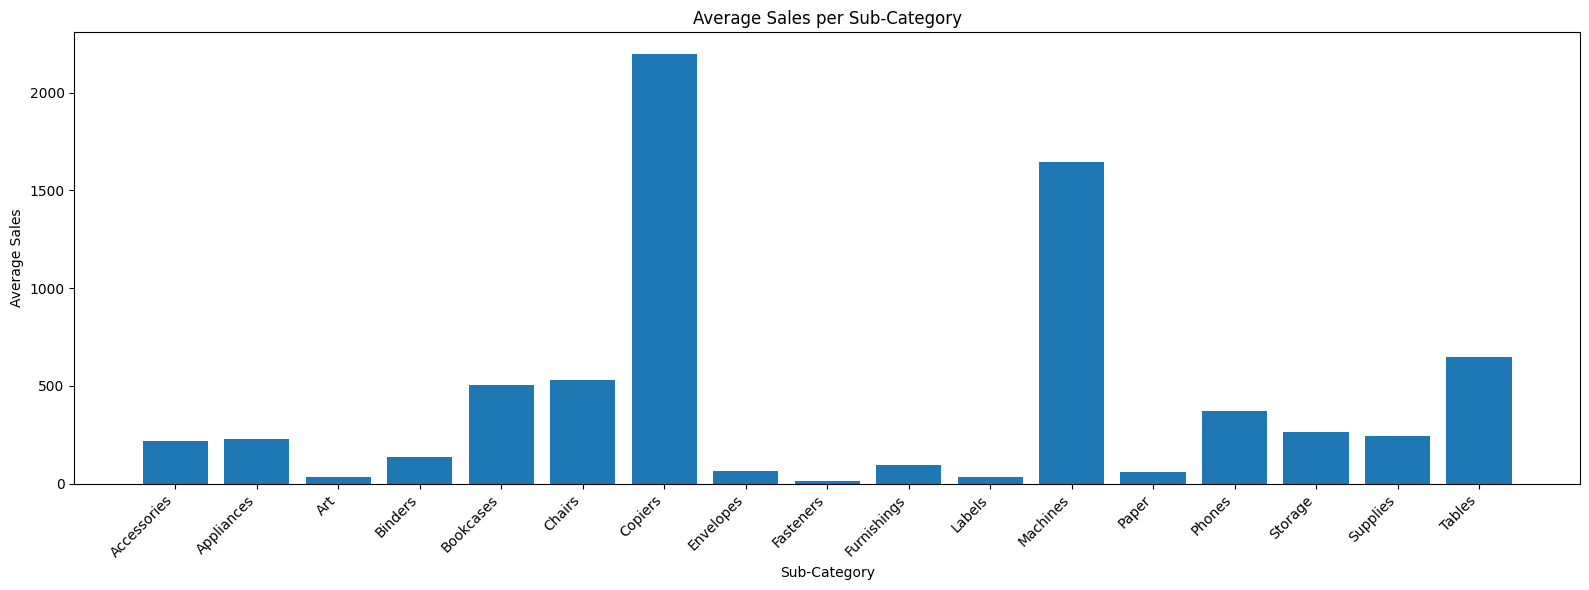

In [46]:
# Average sales per sub-cat
k = pd.read_sql_query('''
SELECT
    Sub_Category,
    AVG(Sales) AS Average_Sales
FROM store
GROUP BY
    Sub_Category;
''', conn)

# Plotting the bar chart
plt.figure(figsize=(16, 6))
plt.bar(k['Sub_Category'], k['Average_Sales'])
plt.xlabel('Sub-Category')
plt.ylabel('Average Sales')
plt.title('Average Sales per Sub-Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [79]:
#SQL query to calculate the average sales for each sub-category
k = pd.read_sql_query('''
SELECT
    Sub_Category,
    AVG(Sales) AS Average_Sales
FROM store
GROUP BY
    Sub_Category;
''', conn)
k      # Display the resulting DataFrame 'k'

,Sub_Category,Average_Sales
0,Accessories,215.974604
1,Appliances,229.768374
2,Art,34.068834
3,Binders,133.640731
4,Bookcases,503.859633
5,Chairs,532.332420
6,Copiers,2198.941618
7,Envelopes,64.867724
8,Fasteners,13.936774
9,Furnishings,95.825668


### **10) Heat map to check correlation between the columns**

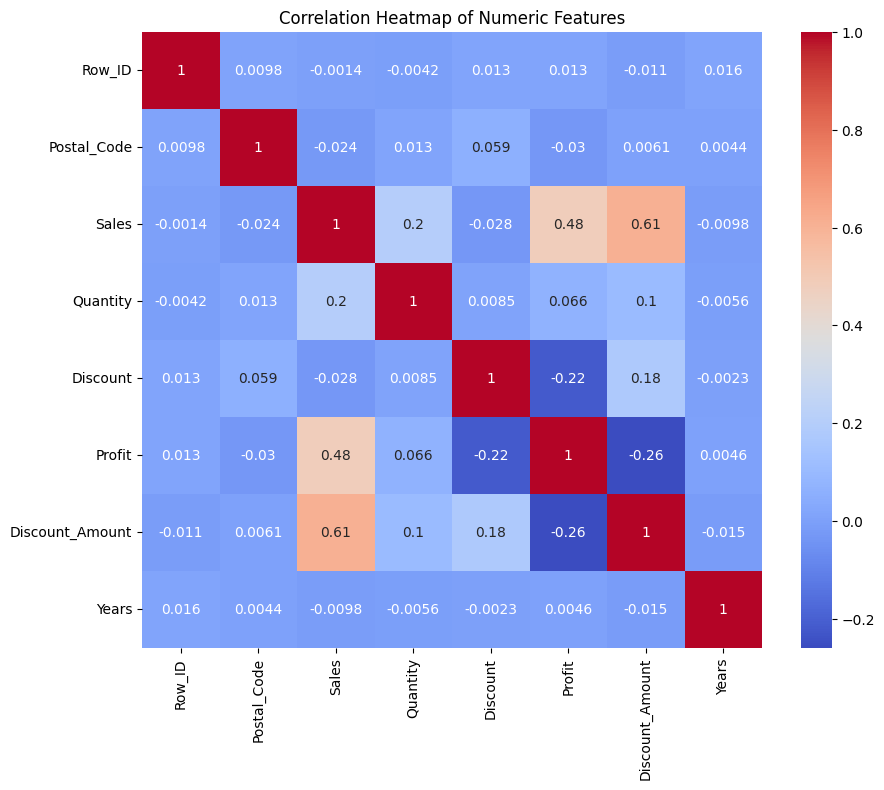

In [49]:
# Select only integer and float columns
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Create the heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


# Insights from the given dataset:

# **Sales and Profitability:**
# * **Average sales vary significantly across sub-categories.** Some sub-categories have much higher average sales than others, indicating potential areas for focus and optimization.
# * **There is a moderate positive correlation between Sales and Profit.** This suggests that higher sales generally lead to higher profits, but other factors also influence profitability.

# **Returns:**
# * **The most common return reason is "Wrong size",** followed by "Didn't like the product" and "Damaged product". This highlights the importance of accurate product information and quality control.
# * **Certain sub-categories have higher return rates than others.** This information can be used to identify potential issues with specific products or sub-categories.
# * **New customers have a slightly higher return rate compared to returning customers.** This could indicate a need for better onboarding or customer service for new customers.

# **Customer and Region:**
# * **Most orders come from the West region**, followed by the East and Central regions. This suggests potential regional differences in customer behavior or market demand.
# * **The majority of customers are one-time buyers.** This indicates a potential for improving customer retention strategies.
# * **Certain cities and states have higher return rates.** This information can be used to target specific areas for improvement in logistics or customer service.

# **Product Categories:**
# * **The most popular product category is "Office Supplies",** followed by "Furniture" and "Technology". Understanding category-level trends can inform inventory management and marketing strategies.
# * **Different categories have varying return reasons.** This suggests that the factors influencing returns might differ across product types.


# **Recommendations:**
# * **Focus on improving product information and sizing accuracy to reduce returns due to "Wrong size".**
# * **Investigate the reasons for higher return rates in specific sub-categories and address potential product quality or customer satisfaction issues.**
# * **Develop targeted marketing and customer retention strategies to increase repeat purchases.**
# * **Analyze regional differences in sales and returns to optimize logistics and inventory management.**
# * **Monitor customer feedback and reviews to identify areas for improvement in products and services.**
